### Atividade

Instruções
- Para resolver as questões abaixo utilizar o dataset do seaborn: 'mpg'
- Para os gráficos finais de cada questão, eles devem possuir título, rótulo dos eixos definidos e legenda (quando necessário).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando Dataset

mpg = sns.load_dataset('mpg')

In [3]:
# Algumas infos do dataset

mpg.shape

(398, 9)

In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# Imprime as primeiras linhas do dataset
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Questão 01

Verificar se a base de dados possui valores nulos. Para as linhas com valores nulos, deletar as mesmas. Ao final da questão verificar se a base de dados ficou com 392 registros e 9 colunas.

In [6]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
# Excluindo as linhas com valores nulos

mpg.dropna(inplace=True)
mpg.shape

(392, 9)

### Questão 02

Qual a quantidade de carros por origem (origin)? Responda utilizando um gráfico de barras e inclua os rótulos dos dados.

In [8]:
qnt_origin = mpg['origin'].value_counts()
qnt_origin

usa       245
japan      79
europe     68
Name: origin, dtype: int64

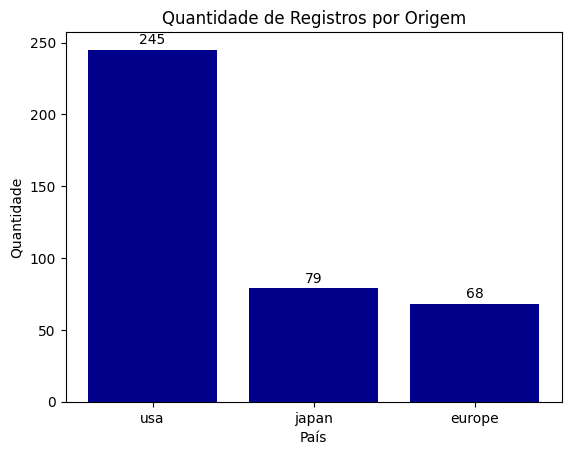

In [9]:

fig, ax = plt.subplots()
bars = ax.bar(qnt_origin.index, qnt_origin.values, data=qnt_origin, color='darkblue')

plt.title('Quantidade de Registros por Origem')
plt.xlabel('País')
plt.ylabel('Quantidade')

ax.bar_label(bars, padding=2)

plt.show()

### Questão 03

Qual a média da potência (horsepower) dos carros por origem?

In [10]:
media_pot = mpg[['origin', 'horsepower']].groupby('origin').mean().sort_values(by='horsepower', ascending=False)
media_pot

,horsepower
origin,
usa,119.048980
europe,80.558824
japan,79.835443


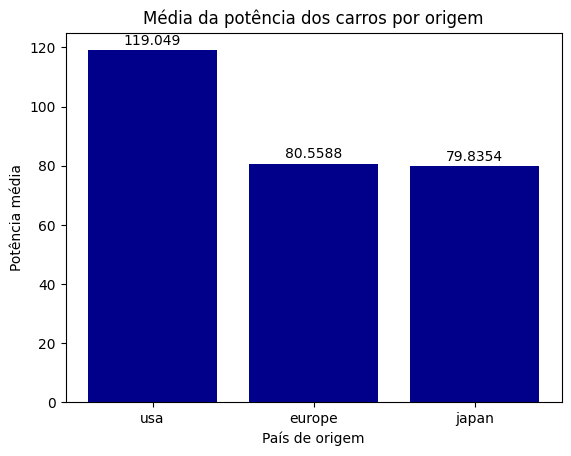

In [11]:
fig, ax = plt.subplots()
bars = ax.bar(media_pot.index, 'horsepower', data=media_pot, color='darkblue')

plt.title('Média da potência dos carros por origem')
plt.xlabel('País de origem')
plt.ylabel('Potência média')

ax.bar_label(bars, padding=2)

plt.show()

### Questão 04

Qual a correlacão da potência (horsepower) com a aceleração (acceleration) cos carros?

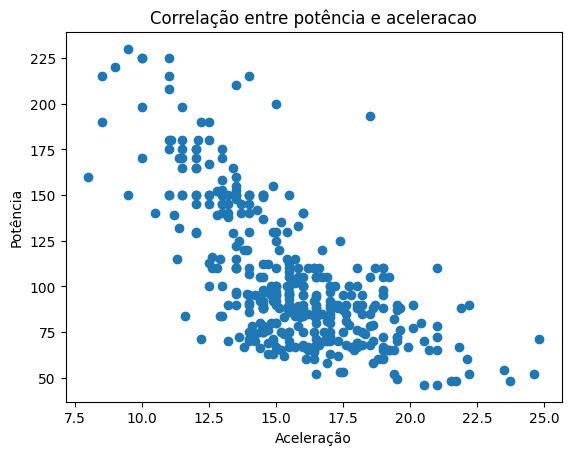

In [12]:
x_scatter = mpg['acceleration']
y_scatter = mpg['horsepower']

plt.scatter(x_scatter, y_scatter)
plt.title('Correlação entre potência e aceleracao')
plt.xlabel('Aceleração')
plt.ylabel('Potência')
plt.show()

### Questão 05

Qual a correlacão da potência (horsepower) com a aceleração (acceleration) dos carros, segmentando de acordo com a origem (origin) com cores diferentes e plotando no mesmo eixo (axes)?

In [13]:
df_usa = mpg.query("origin == 'usa'")
df_japan = mpg.query("origin == 'japan'")
df_europe = mpg.query("origin == 'europe'")

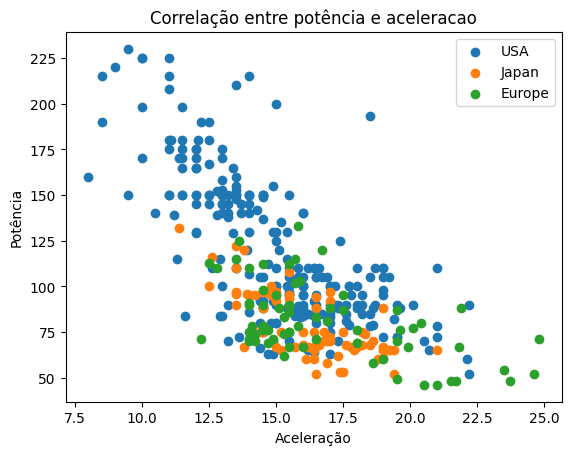

In [14]:

fig = plt.subplot()
plt.scatter('acceleration', 'horsepower', data=df_usa, label='USA')
plt.scatter('acceleration', 'horsepower', data=df_japan, label='Japan')
plt.scatter('acceleration', 'horsepower', data=df_europe, label='Europe')
plt.title('Correlação entre potência e aceleracao')
plt.xlabel('Aceleração')
plt.ylabel('Potência')
plt.legend()
plt.show();